In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
# Dispaly max column
pd.pandas.set_option('display.max_columns',None)
# Display max rows
#pd.pandas.set_option('display.max_rows', None)

In [2]:
## loading dataset using pandas library
telcom = pd.read_csv("telcom_clean.csv")

## print the top5 records
telcom.head(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.310000e+19,04-04-2019 12:01,770.0,25-04-2019 14:35,662.0,1823652.0,2.080000e+14,3.366496e+10,3.550000e+13,9.16E+15,42.000000,5.000000,23.0,44.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.310000e+19,09-04-2019 13:04,235.0,25-04-2019 08:15,606.0,1365104.0,2.080000e+14,3.368185e+10,3.580000e+13,L77566A,65.000000,5.000000,16.0,26.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.310000e+19,09-04-2019 17:42,1.0,25-04-2019 11:58,652.0,1361762.0,2.080000e+14,3.376063e+10,3.530000e+13,D42335A,109.795706,17.662883,6.0,9.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.310000e+19,10-04-2019 00:31,486.0,25-04-2019 07:36,171.0,1321509.0,2.080000e+14,3.375034e+10,3.540000e+13,T21824A,109.795706,17.662883,44.0,44.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,3330.0,37882.0,1.321510e+09,undefined,undefined,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.310000e+19,12-04-2019 20:10,565.0,25-04-2019 10:40,954.0,1089009.0,2.080000e+14,3.369980e+10,3.540000e+13,D88865A,109.795706,17.662883,6.0,9.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [3]:
telcom_df = telcom[['MSISDN/Number', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 
           'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
           'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
            'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
                '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
                'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
                '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',            
           'Handset Type']].copy()

In [4]:
telcom_df.head()

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Handset Type
0,3.366496e+10,42.000000,5.000000,23.0,44.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,Samsung Galaxy A5 Sm-A520F
1,3.368185e+10,65.000000,5.000000,16.0,26.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,Samsung Galaxy J5 (Sm-J530)
2,3.376063e+10,109.795706,17.662883,6.0,9.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,Samsung Galaxy A8 (2018)
3,3.375034e+10,109.795706,17.662883,44.0,44.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,undefined
4,3.369980e+10,109.795706,17.662883,6.0,9.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,Samsung Sm-G390F


### Lets handle the missing values

<Axes: >

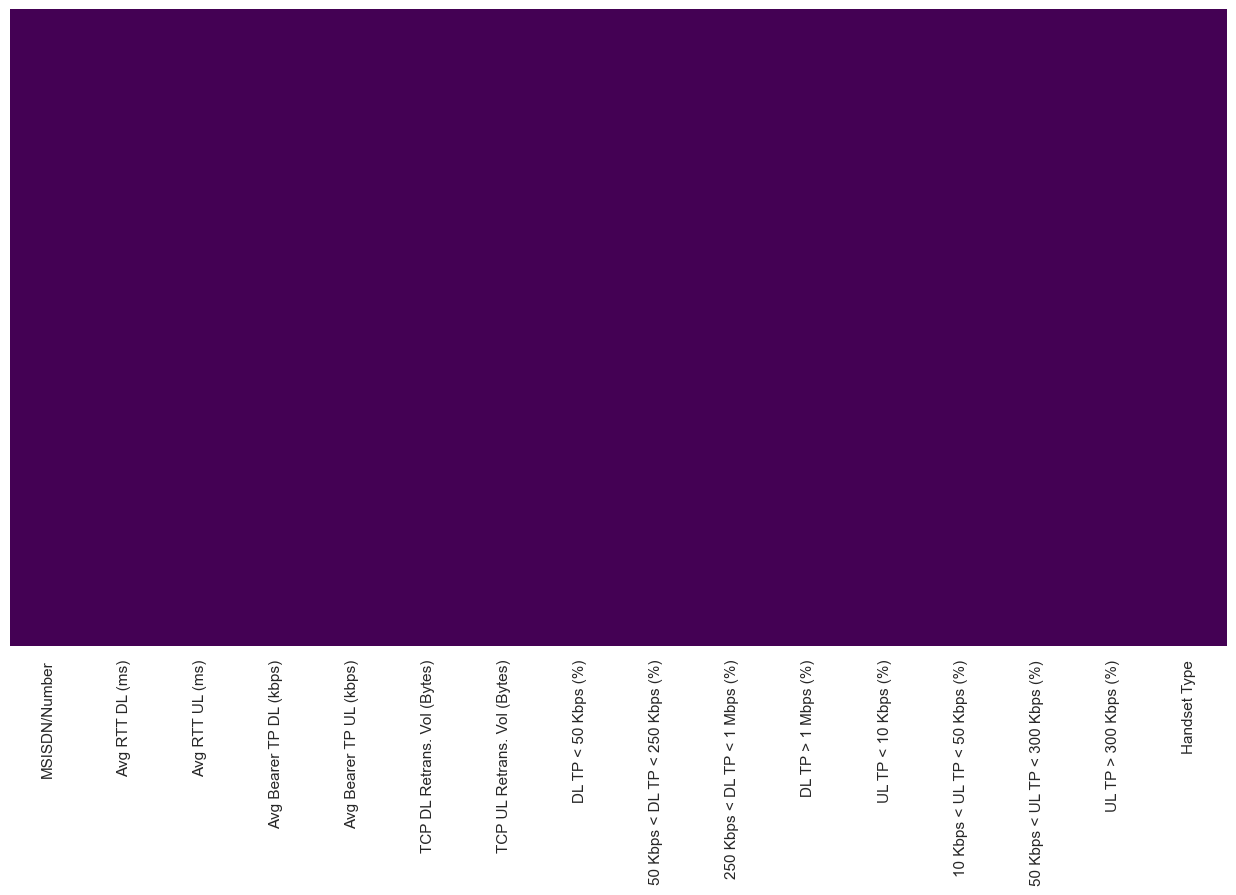

In [5]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.heatmap(telcom_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

***There are not missing values in dataset***

### Lets handle outliners

<Axes: xlabel='DL TP > 1 Mbps (%)'>

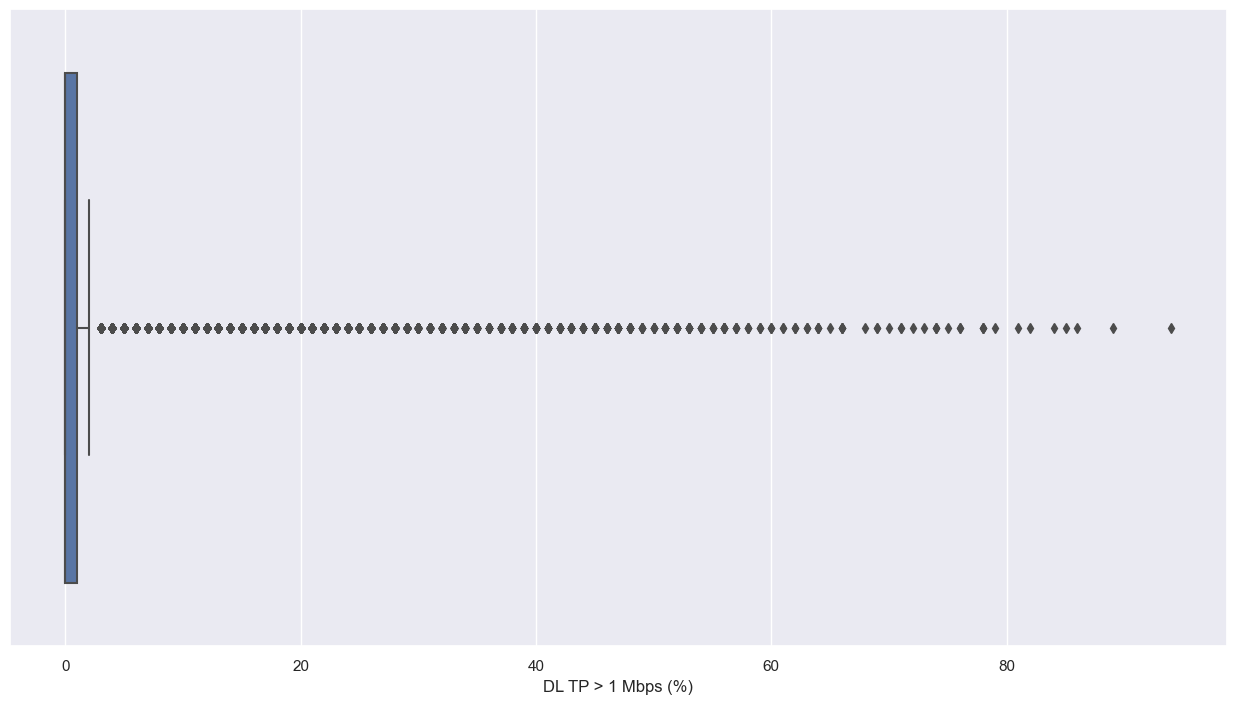

In [6]:
sns.boxplot(x=telcom_df['DL TP > 1 Mbps (%)'],data=telcom_df)

In [7]:
def outlier(df):
    column_name=['Avg RTT DL (ms)','Avg RTT UL (ms)','TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
                'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
                'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
                '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
                'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
                '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)']
    for i in column_name:
        upper_quartile=df[i].quantile(0.75)
        lower_quartile=df[i].quantile(0.25)
        df[i]=np.where(df[i]>upper_quartile,df[i].mean(),np.where(df[i]<lower_quartile,df[i].mean(),df[i]))
    return df

In [8]:
experience_df = outlier(telcom_df)

In [9]:
telcom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   MSISDN/Number                   150000 non-null  float64
 1   Avg RTT DL (ms)                 150000 non-null  float64
 2   Avg RTT UL (ms)                 150000 non-null  float64
 3   Avg Bearer TP DL (kbps)         150000 non-null  float64
 4   Avg Bearer TP UL (kbps)         150000 non-null  float64
 5   TCP DL Retrans. Vol (Bytes)     150000 non-null  float64
 6   TCP UL Retrans. Vol (Bytes)     150000 non-null  float64
 7   DL TP < 50 Kbps (%)             150000 non-null  float64
 8   50 Kbps < DL TP < 250 Kbps (%)  150000 non-null  float64
 9   250 Kbps < DL TP < 1 Mbps (%)   150000 non-null  float64
 10  DL TP > 1 Mbps (%)              150000 non-null  float64
 11  UL TP < 10 Kbps (%)             150000 non-null  float64
 12  10 Kbps < UL TP 

#### Check for outliners

<Axes: xlabel='DL TP > 1 Mbps (%)'>

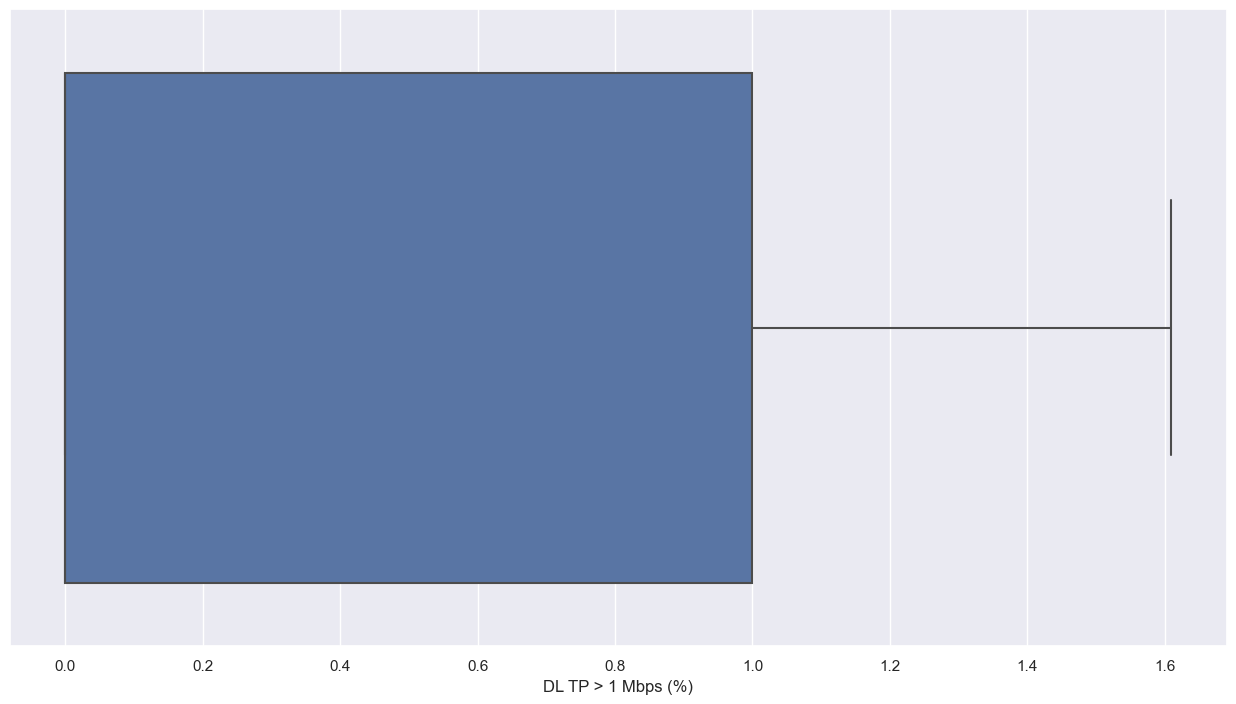

In [10]:
sns.boxplot(x=telcom_df['DL TP > 1 Mbps (%)'],data=telcom_df)

In [11]:
experience_df.head()

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Handset Type
0,3.366496e+10,42.000000,5.000000,23.0,44.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,Samsung Galaxy A5 Sm-A520F
1,3.368185e+10,65.000000,5.000000,16.0,26.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,Samsung Galaxy J5 (Sm-J530)
2,3.376063e+10,109.795706,17.662883,6.0,9.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,Samsung Galaxy A8 (2018)
3,3.375034e+10,109.795706,17.662883,44.0,44.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,undefined
4,3.369980e+10,109.795706,17.662883,6.0,9.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,Samsung Sm-G390F


# Task 3. 1 - Aggregate, per customer, the following information (treat missing & outliers by replacing with the mean or the mode of the corresponding variable):


## Average TCP retransmission

In [12]:
# Calculate the average TCP retransmission per customer
avg_tcp_retransmission = experience_df.groupby('MSISDN/Number')[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']].mean()

# Calculate the total average TCP retransmission by summing DL and UL then dividing by 2
avg_tcp_retransmission['Avg TCP Retransmission'] = (avg_tcp_retransmission['TCP DL Retrans. Vol (Bytes)'] + avg_tcp_retransmission['TCP UL Retrans. Vol (Bytes)']) / 2

# Display the head of the average TCP retransmission dataframe
avg_tcp_retransmission.head()

,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg TCP Retransmission
MSISDN/Number,,,
3.360100e+10,2.080991e+07,759658.664811,1.078479e+07
3.360100e+10,2.080991e+07,759658.664811,1.078479e+07
3.360100e+10,2.080991e+07,759658.664811,1.078479e+07
3.360101e+10,2.080991e+07,759658.664811,1.078479e+07
3.360101e+10,1.985301e+07,759658.664811,1.030634e+07


## Average RTT

In [13]:
# Calculate the average RTT per customer
avg_rtt = experience_df.groupby('MSISDN/Number')[['Avg RTT DL (ms)', 'Avg RTT UL (ms)']].mean()

# Calculate the total average RTT by summing DL and UL then dividing by 2
avg_rtt['Avg RTT'] = (avg_rtt['Avg RTT DL (ms)'] + avg_rtt['Avg RTT UL (ms)']) / 2

# Display the head of the average RTT dataframe
avg_rtt.head()

,Avg RTT DL (ms),Avg RTT UL (ms),Avg RTT
MSISDN/Number,,,
3.360100e+10,46.000000,17.662883,31.831441
3.360100e+10,109.795706,17.662883,63.729294
3.360100e+10,109.795706,17.662883,63.729294
3.360101e+10,69.000000,15.000000,42.000000
3.360101e+10,97.897853,11.331441,54.614647


## Handset type

In [14]:
# Aggregate the most common handset type per customer

# Group by customer and get the mode of the handset type
most_common_handset = experience_df.groupby('MSISDN/Number')['Handset Type'].agg(lambda x: x.mode()[0])
most_common_handset_df = pd.DataFrame(most_common_handset).reset_index()
# Display the head of the most common handset dataframe
most_common_handset_df.head()

,MSISDN/Number,Handset Type
0,3.360100e+10,Huawei P20 Lite Huawei Nova 3E
1,3.360100e+10,Apple iPhone 7 (A1778)
2,3.360100e+10,undefined
3,3.360101e+10,Apple iPhone 5S (A1457)
4,3.360101e+10,Apple iPhone Se (A1723)


## Average throughput


In [15]:
# Calculate the average throughput per customer
avg_throughput = experience_df.groupby('MSISDN/Number')[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']].mean()

# Calculate the total average throughput by summing DL and UL then dividing by 2
avg_throughput['Avg Throughput'] = (avg_throughput['Avg Bearer TP DL (kbps)'] + avg_throughput['Avg Bearer TP UL (kbps)']) / 2

# Display the head of the average throughput dataframe
avg_throughput.head()

,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Avg Throughput
MSISDN/Number,,,
3.360100e+10,37.0,39.0,38.0
3.360100e+10,48.0,51.0,49.5
3.360100e+10,48.0,49.0,48.5
3.360101e+10,204.0,44.0,124.0
3.360101e+10,20197.5,8224.5,14211.0


# Task 3.2 - Compute & list 10 of the top, bottom and most frequent:


In [16]:
#Calculate total TCP,RTT and Throughput
experience_df["Total TCP"]=experience_df['TCP DL Retrans. Vol (Bytes)']+ experience_df['TCP UL Retrans. Vol (Bytes)']+experience_df['TCP DL Retrans. Vol (Bytes)']+ experience_df['TCP UL Retrans. Vol (Bytes)']
experience_df["Total RTT"]=experience_df['Avg RTT DL (ms)']+telcom_df['Avg RTT UL (ms)']
experience_df["Total Throughput"]=experience_df['DL TP < 50 Kbps (%)']+experience_df['50 Kbps < DL TP < 250 Kbps (%)']+experience_df['250 Kbps < DL TP < 1 Mbps (%)']+experience_df['DL TP > 1 Mbps (%)']+experience_df['UL TP < 10 Kbps (%)']+experience_df['10 Kbps < UL TP < 50 Kbps (%)']+experience_df['50 Kbps < UL TP < 300 Kbps (%)']+experience_df['UL TP > 300 Kbps (%)']

In [17]:
experience_agg_by_customer = experience_df.groupby('MSISDN/Number').agg({'Total TCP': 'sum',
                                                                          'Total RTT': 'sum',
                                                                          'Total Throughput': 'sum', 
                                                                           'Handset Type': lambda x: x.mode()[0]})

In [18]:
experience_agg_by_customer.head()

,Total TCP,Total RTT,Total Throughput,Handset Type
MSISDN/Number,,,,
3.360100e+10,4.313915e+07,63.662883,200.000000,Huawei P20 Lite Huawei Nova 3E
3.360100e+10,4.313915e+07,127.458589,200.000000,Apple iPhone 7 (A1778)
3.360100e+10,4.313915e+07,127.458589,200.000000,undefined
3.360101e+10,4.313915e+07,84.000000,200.000000,Apple iPhone 5S (A1457)
3.360101e+10,8.245069e+07,218.458589,398.547995,Apple iPhone Se (A1723)


## a. TCP values in the dataset. 

In [19]:
tcp_trans = experience_agg_by_customer.sort_values(by=['Total TCP'], ascending=False)

top_10_tcp = tcp_trans.head(10)
bot_10_tcp = tcp_trans.tail(10)
most_tcp_frq = tcp_trans['Total TCP'].value_counts().head(10)

In [20]:
top_10_tcp[['Total TCP']].reset_index()

,MSISDN/Number,Total TCP
0,4.188017e+10,4.533166e+10
1,3.362632e+10,7.765046e+08
2,3.361489e+10,7.333655e+08
3,3.362578e+10,7.333655e+08
4,3.365973e+10,6.902263e+08
5,3.376054e+10,6.393357e+08
6,3.367588e+10,6.197162e+08
7,3.366716e+10,5.569813e+08
8,3.378632e+10,5.176698e+08
9,3.362708e+10,5.176698e+08


In [21]:
bot_10_tcp[['Total TCP']].reset_index()

,MSISDN/Number,Total TCP
0,3.366194e+10,3.921524e+07
1,3.366561e+10,3.921524e+07
2,3.366561e+10,3.921524e+07
3,3.362727e+10,3.921524e+07
4,3.376040e+10,3.921524e+07
5,3.362729e+10,3.921524e+07
6,3.376039e+10,3.921524e+07
7,3.366194e+10,3.921524e+07
8,3.366194e+10,3.921524e+07
9,3.365084e+10,3.921524e+07


In [22]:
most_tcp_frq.reset_index()

,Total TCP,count
0,4.313915e+07,48817
1,4.313915e+07,18483
2,8.627829e+07,7987
3,8.627829e+07,7932
4,3.931154e+07,4880
5,3.921524e+07,3096
6,4.304285e+07,2394
7,8.245069e+07,1587
8,8.235439e+07,1293
9,1.294174e+08,1139


## b. RTT values in the dataset.


In [23]:
tcp_rtt = experience_agg_by_customer.sort_values(by=['Total RTT'], ascending=False)

top_10_rtt = tcp_rtt.head(10)
bot_10_rtt = tcp_rtt.tail(10)
most_rtt_frq = tcp_rtt['Total RTT'].value_counts().head(10)

In [24]:
top_10_rtt[['Total RTT']].reset_index()

,MSISDN/Number,Total RTT
0,4.188017e+10,105870.678003
1,3.362632e+10,2210.277304
2,3.361489e+10,2023.697243
3,3.362578e+10,1879.780065
4,3.376054e+10,1815.431597
5,3.378632e+10,1513.177302
6,3.366716e+10,1469.381596
7,3.366646e+10,1321.404298
8,3.365973e+10,1257.077300
9,3.362708e+10,1245.403065


In [25]:
bot_10_rtt[['Total RTT']].reset_index()

,MSISDN/Number,Total RTT
0,3.366717e+10,38.0
1,3.361618e+10,38.0
2,3.364946e+10,38.0
3,3.363687e+10,38.0
4,3.360755e+10,38.0
5,3.360904e+10,38.0
6,3.362946e+10,38.0
7,3.375416e+10,38.0
8,3.366369e+10,38.0
9,3.363362e+10,38.0


In [26]:
most_rtt_frq.reset_index()

,Total RTT,count
0,127.458589,31146
1,254.917178,3707
2,114.795706,2987
3,112.795706,2213
4,113.795706,2156
5,115.795706,1727
6,116.795706,1037
7,55.662883,828
8,54.662883,815
9,49.000000,807


### c. Throughput values in the dataset.


In [27]:
tcp_throuput = experience_agg_by_customer.sort_values(by=['Total Throughput'], ascending=False)

top_10_throuput = tcp_throuput.head(10)
bot_10_throuput = tcp_throuput.tail(10)
most_rtt_throuput = tcp_throuput['Total Throughput'].value_counts().head(10)

In [28]:
top_10_throuput[['Total Throughput']].reset_index()

,MSISDN/Number,Total Throughput
0,4.188017e+10,211365.368797
1,3.362632e+10,3573.983464
2,3.362578e+10,3375.530329
3,3.361489e+10,3364.820847
4,3.365973e+10,3172.721910
5,3.376054e+10,2985.938342
6,3.367588e+10,2976.010392
7,3.366716e+10,2572.450817
8,3.378632e+10,2388.937089
9,3.376041e+10,2386.289665


In [29]:
bot_10_throuput[['Total Throughput']].reset_index()

,MSISDN/Number,Total Throughput
0,3.364855e+10,192.717341
1,3.366662e+10,192.609654
2,3.361680e+10,192.609654
3,3.369991e+10,192.609654
4,3.366256e+10,192.599497
5,3.366614e+10,192.139796
6,3.366146e+10,192.064533
7,3.369943e+10,191.916545
8,3.366604e+10,191.916545
9,3.366255e+10,191.287783


In [30]:
most_rtt_throuput.reset_index()

,Total Throughput,count
0,200.000000,47723
1,400.000000,7112
2,198.547995,5181
3,199.000000,3105
4,198.000000,2836
5,398.547995,2601
6,198.241104,2054
7,197.000000,1929
8,196.631450,1085
9,197.631450,1022


## Task 3.3 - Compute & report:
    d.	The distribution of the average throughput  per handset type and provide interpretation for your findings.
    e.	The average TCP retransmission view per handset type and provide interpretation for your findings.



In [50]:
handset_type_df = experience_agg_by_customer.groupby('Handset Type').agg(
    {'Total Throughput': 'mean', 'Total TCP': 'mean'})
handset_type_df.head()

,Total Throughput,Total TCP
Handset Type,,
A-Link Telecom I. Cubot A5,197.454408,4.313915e+07
A-Link Telecom I. Cubot Note Plus,198.717341,4.313915e+07
A-Link Telecom I. Cubot Note S,198.241104,4.304285e+07
A-Link Telecom I. Cubot Nova,198.547995,4.313915e+07
A-Link Telecom I. Cubot Power,198.241104,4.313915e+07


In [51]:
sorted_by_tp = handset_type_df.sort_values(
    'Total Throughput', ascending=False)
top_tp = sorted_by_tp['Total Throughput']

In [52]:
top_tp.head().reset_index()

,Handset Type,Total Throughput
0,Missing,211365.368797
1,Huawei Me909S-120,698.920347
2,Huawei B618S-22D,663.038762
3,Apple iPhone Xr (A2106),598.500000
4,Huawei Evr-Al00,598.000000


In [56]:
sorted_by_tcp = handset_type_df.sort_values(
    'Total TCP', ascending=False)
top_tcp = sorted_by_tcp['Total TCP']

In [57]:
top_tcp.head().reset_index()

,Handset Type,Total TCP
0,Missing,4.533166e+10
1,Huawei Me909S-120,1.509870e+08
2,Huawei B618S-22D,1.372252e+08
3,Apple iPhone Xr (A2106),1.294174e+08
4,Huawei Evr-Al00,1.294174e+08


### Task 3.4 - Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster.

In [42]:
experience_agg_by_customer.head()

,Total TCP,Total RTT,Total Throughput,Handset Type
MSISDN/Number,,,,
3.360100e+10,4.313915e+07,63.662883,200.000000,Huawei P20 Lite Huawei Nova 3E
3.360100e+10,4.313915e+07,127.458589,200.000000,Apple iPhone 7 (A1778)
3.360100e+10,4.313915e+07,127.458589,200.000000,undefined
3.360101e+10,4.313915e+07,84.000000,200.000000,Apple iPhone 5S (A1457)
3.360101e+10,8.245069e+07,218.458589,398.547995,Apple iPhone Se (A1723)


In [58]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.cluster import KMeans


def normalizer(df, columns):
    norm = Normalizer()
    return pd.DataFrame(norm.fit_transform(df), columns=columns)

def scaler(df, columns):
    minmax_scaler = MinMaxScaler()
    return pd.DataFrame(minmax_scaler.fit_transform(df), columns=columns)

def scale_and_normalize(df,columns ):
    return normalizer(scaler(df, columns), columns)

In [59]:
def cluser_label(x: int, cols: list = []) -> str:
    if (not type(x) == int):
        return x
    if (x < len(cols)):
        return cols[x]

    return str(x)

In [60]:
metrics = experience_agg_by_customer[[ 'Total TCP','Total RTT', 'Total Throughput']]
normalized_metrics = scale_and_normalize(metrics, [ 'Total TCP','Total RTT', 'Total Throughput'])
normalized_metrics.describe()

,Total TCP,Total RTT,Total Throughput
count,106857.000000,106857.000000,106857.000000
mean,0.290095,0.865272,0.207217
std,0.225431,0.182735,0.200003
min,0.000000,0.000000,0.000000
25%,0.101838,0.781892,0.048496
50%,0.180083,0.978378,0.089123
75%,0.483822,0.993618,0.398174
max,0.988639,0.999955,1.000000


In [61]:
kmeans = KMeans(n_clusters=3, init='k-means++').fit(normalized_metrics)
pred = kmeans.predict(normalized_metrics)

experience_metrics_with_cluster = experience_agg_by_customer.copy()
experience_metrics_with_cluster['clusters'] = pred
experience_metrics_with_cluster['clusters'].value_counts()

clusters
0    61235
1    24647
2    20975
Name: count, dtype: int64

In [62]:
experience_metrics_with_cluster = experience_metrics_with_cluster.rename(columns={'Total TCP': 'Total_TCP', 'Total RTT': 'Total_RTT','Total Throughput':'Total_Throughput'})

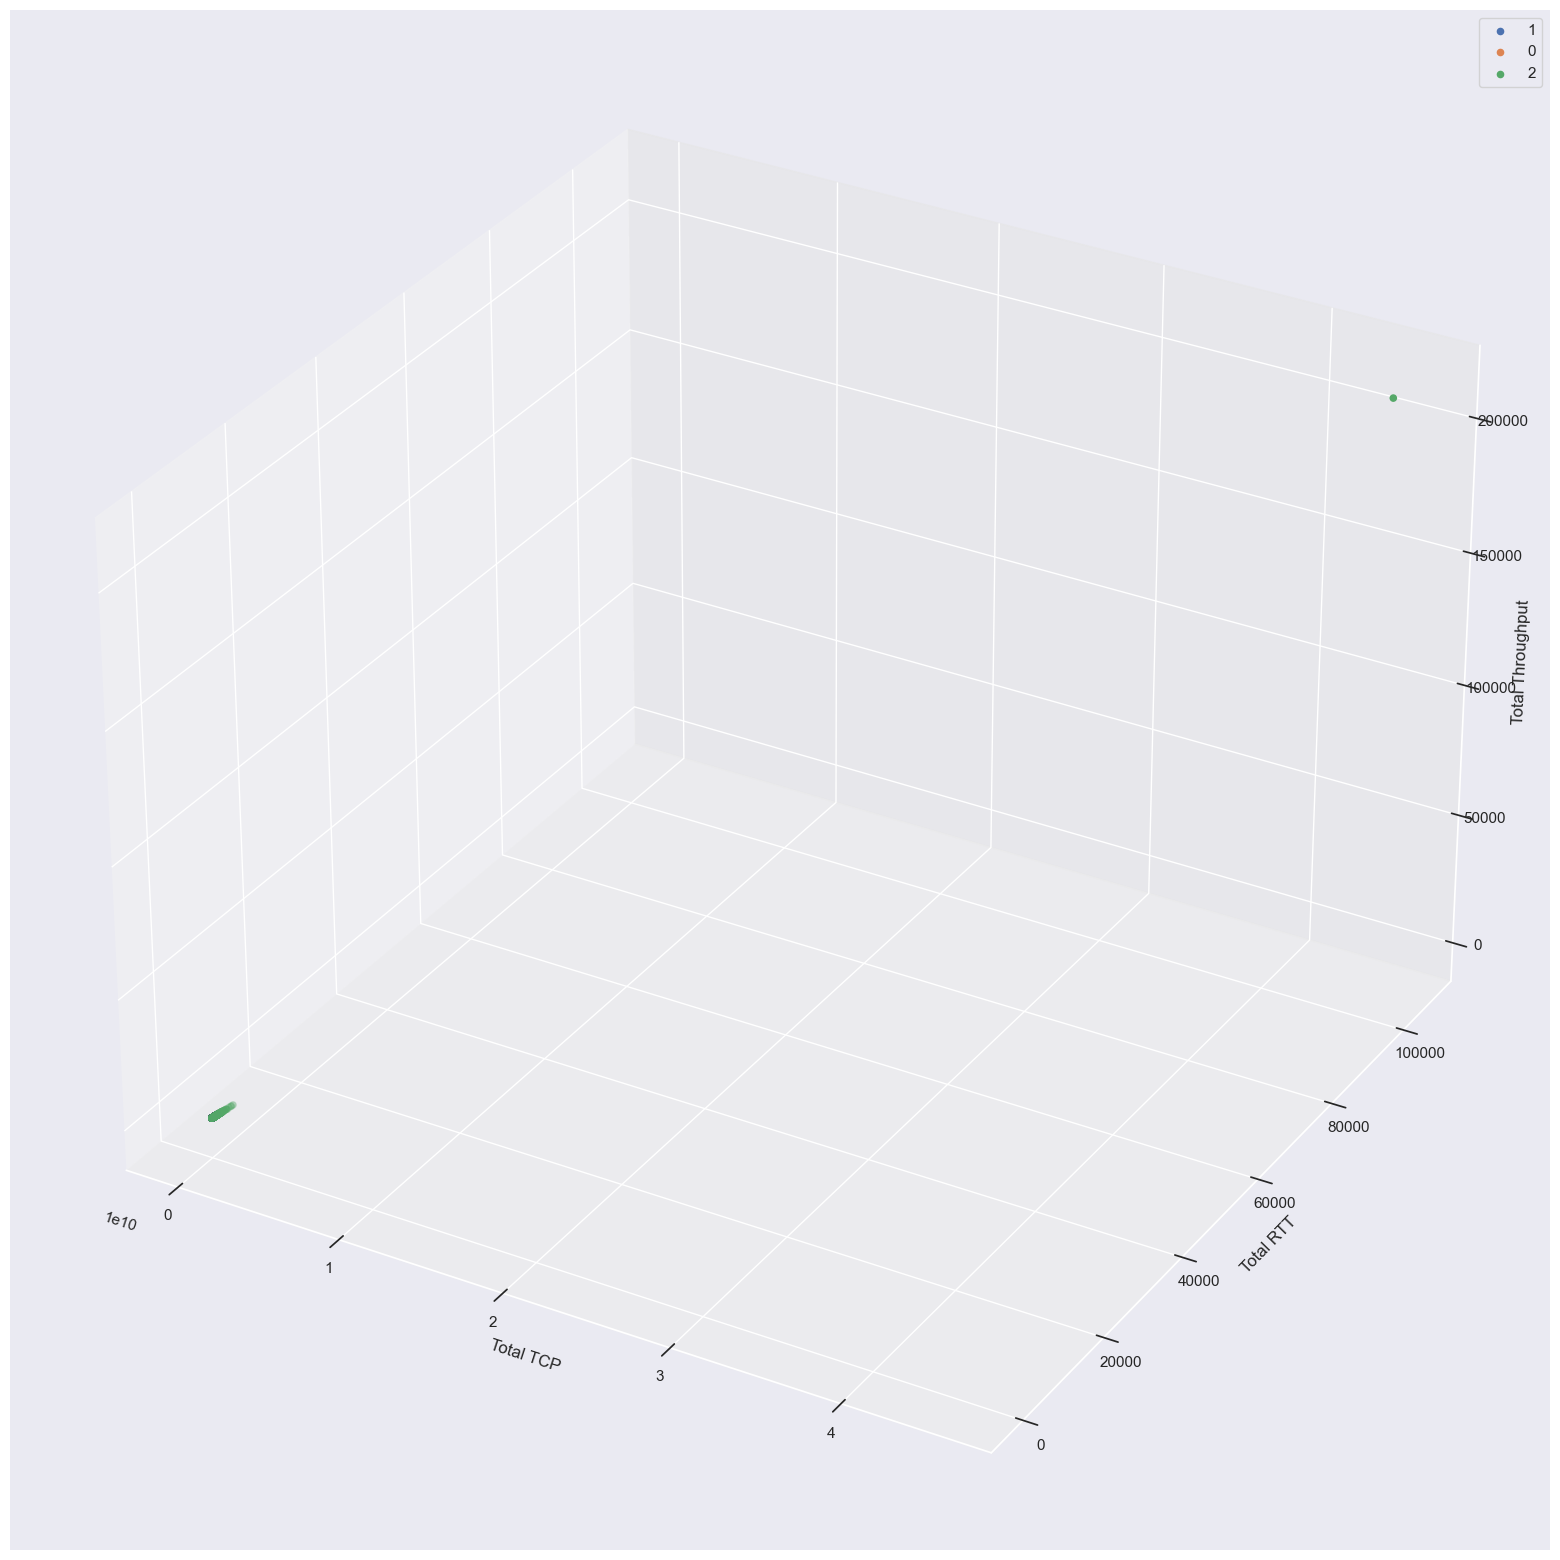

In [63]:
from matplotlib import cm
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(111,projection='3d')
for s in experience_metrics_with_cluster.clusters.unique():
    ax.scatter(experience_metrics_with_cluster.Total_TCP[experience_metrics_with_cluster.clusters==s],experience_metrics_with_cluster.Total_RTT[experience_metrics_with_cluster.clusters==s],experience_metrics_with_cluster.Total_Throughput[experience_metrics_with_cluster.clusters==s],label=s)
    ax.set_xlabel('Total TCP')
    ax.set_ylabel('Total RTT')
    ax.set_zlabel('Total Throughput')
    ax.legend()

In [64]:
experience_metrics_with_cluster_2 = experience_metrics_with_cluster.copy()
experience_metrics_with_cluster_2 = experience_metrics_with_cluster_2.drop('Handset Type', axis=1)
kmeans

KMeans(n_clusters=3)

In [65]:
distance = kmeans.fit_transform(experience_metrics_with_cluster_2)

distance_from_less_exp = list(map(lambda x : x[0], distance))

distance_from_less_exp
experience_metrics_with_cluster_2['Experiance_score'] = distance_from_less_exp

In [66]:
experience_metrics_with_cluster_2['MSISDN/Number'] = experience_metrics_with_cluster_2.index

In [67]:
experience_metrics_with_cluster_2.head()

,Total_TCP,Total_RTT,Total_Throughput,clusters,Experiance_score,MSISDN/Number
MSISDN/Number,,,,,,
3.360100e+10,4.313915e+07,63.662883,200.000000,1,3.996285e+05,3.360100e+10
3.360100e+10,4.313915e+07,127.458589,200.000000,0,3.996285e+05,3.360100e+10
3.360100e+10,4.313915e+07,127.458589,200.000000,0,3.996285e+05,3.360100e+10
3.360101e+10,4.313915e+07,84.000000,200.000000,0,3.996285e+05,3.360101e+10
3.360101e+10,8.245069e+07,218.458589,398.547995,1,3.971117e+07,3.360101e+10


In [68]:
experience_metrics_with_cluster_2.to_csv("experience_analytics.csv", index=False)